In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_csv("Data/Train.csv")

In [3]:
X=[]
y=[]


X=df.drop(df.loc[:,(df.columns.str.contains("target"))],axis=1)
X=X.drop(["Place_ID X Date","Place_ID"],axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])


y=df["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]

In [4]:
X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)

27.670352911513344

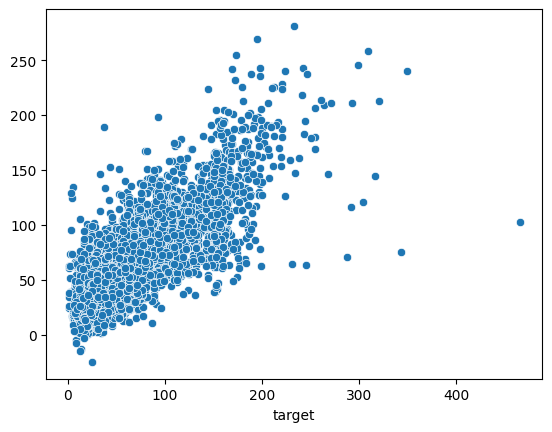

In [5]:
boost=XGBRegressor(eval_metric="rmse")
boost.fit(X_train,y_train)

y_pred=boost.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [6]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree'],
              'learning_rate': [0.1], 
              'max_depth': [7,8,9,10,11],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [900,1000,1100],
              "reg_alpha"   : [0.5,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [2,3]}

rs=RandomizedSearchCV(boost,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
parameters = {'max_depth': [9,10,11,],
              'min_child_weight': [24,25,26,27],
              'n_estimators': [1050,1100,1150],
              "reg_lambda"  : [4,5,6],
              "gamma"       : [1.5,2,2.5]}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

In [ ]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
parameters = {'max_depth': [7,8,9,10],
              'min_child_weight': [22,23,24,25],
              'n_estimators': [1150,1200],
}
rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

In [ ]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))